## 코드를 가져온다

In [14]:
import urllib.parse
# 쿼리스트링 하는데 이용? (구글링 ㄱ)

import pandas as pd

In [15]:
# 딕셔너리 형태
MARKET_CODE_DICT = {

    'kospi': 'stockMkt',

    'kosdaq': 'kosdaqMkt',

    'konex': 'konexMkt'

}

DOWNLOAD_URL = 'https://kind.krx.co.kr/corpgeneral/corpList.do'

In [16]:
# 0으로 채우기 위한 함수 ( 6자리 아닌 경우에 0으로 채움 )
def zeroFill(columnValue):

    columnValue = str(columnValue)

    outValue = columnValue.zfill(6)

    return outValue

In [17]:
def get_stock_codes(market=None, delisted=False):

    params = {'method': 'download'}

    if market.lower() in MARKET_CODE_DICT:

        ## marketType 키 추가

        params['marketType'] = MARKET_CODE_DICT[market]

        print(market.lower()+" market key is exist")

    else:

        print("invalid market")

    # make url  key=value & key = value

    params_string = urllib.parse.urlencode(params)

    request_url = DOWNLOAD_URL+"?"+params_string

    df = pd.read_html(request_url)[0]

    df["종목코드"] = df.종목코드.apply(zeroFill)
#     df["종목코드"] = df.종목코드.map('{:06d}'.format) # 동일 결과
 
    return df

In [29]:
stocks = get_stock_codes('kospi')

stocks.head(2)

kospi market key is exist


,회사명,종목코드,업종,주요제품,상장일,결산월,대표자명,홈페이지,지역
0,DRB동일,004840,고무제품 제조업,"고무벨트(V벨트,콘베이어벨트,평벨트),프라스틱제품 제조,판매",1976-05-21,12월,류영식,http://drbworld.com,부산광역시
1,DSR,155660,1차 비철금속 제조업,합섬섬유로프,2013-05-15,12월,홍석빈,http://www.dsr.com,부산광역시


In [20]:
stock_code = stocks.iloc[0]['종목코드']
stock_name = stocks.iloc[0]['회사명']
print(stock_name)
print(stock_code)

DRB동일
004840


## 데이터

In [21]:
import FinanceDataReader as web
from datetime import date, timedelta
import matplotlib.pyplot as plt
import datetime
%matplotlib inline
from matplotlib import font_manager, rc
import platform

print(platform.system())

if platform.system() == 'Windows':
    font_name = font_manager.FontProperties(fname="c:/Windows/Fonts/malgun.ttf").get_name()
    rc('font', family=font_name)
elif platform.system() == 'Darwin':
    rc('font', family='AppleGothic')
else:
    pass

Windows


In [22]:
end = date.today()
start = date.today() - timedelta(50) # datetime.datetime(2021,4,1) 

STOCK = web.DataReader(stock_code, start, end)
STOCK

,Open,High,Low,Close,Volume,Change
Date,,,,,,
2021-03-29,6930,6930,6680,6700,26606,-0.014706
2021-03-30,6730,6820,6640,6820,68369,0.017910
2021-03-31,6800,6800,6670,6760,24805,-0.008798
2021-04-01,6770,6960,6690,6760,30198,0.000000
2021-04-02,6750,6750,6600,6700,26784,-0.008876
2021-04-05,6700,6720,6490,6540,85287,-0.023881
2021-04-06,6490,6600,6480,6580,51066,0.006116
2021-04-07,6580,6730,6570,6630,47284,0.007599
2021-04-08,6650,6720,6640,6700,17600,0.010558


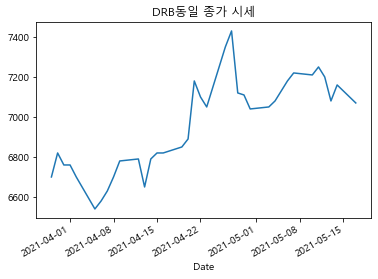

In [23]:
STOCK['Close'].plot()
# print(plt.style.available)
# plt.style.use(['fivethirtyeight'])
plt.title(stock_name+" 종가 시세")
plt.show()

In [24]:
STOCK.tail()
STOCK["MA_5"]=STOCK["Close"].rolling(window=5).mean() # min_periods=1
STOCK["MA_20"]=STOCK["Close"].rolling(window=20).mean()
STOCK["diff"]=STOCK["MA_5"]-STOCK["MA_20"]
STOCK.tail(5)

,Open,High,Low,Close,Volume,Change,MA_5,MA_20,diff
Date,,,,,,,,,
2021-05-11,7120,7290,7100,7250,39749,0.005548,7188.0,7059.5,128.5
2021-05-12,7330,7330,7080,7200,61435,-0.006897,7212.0,7087.0,125.0
2021-05-13,7130,7270,7010,7080,44870,-0.016667,7192.0,7101.5,90.5
2021-05-14,7150,7160,7040,7160,19847,0.011299,7180.0,7118.5,61.5
2021-05-17,7180,7200,7070,7070,10669,-0.012570,7152.0,7131.0,21.0


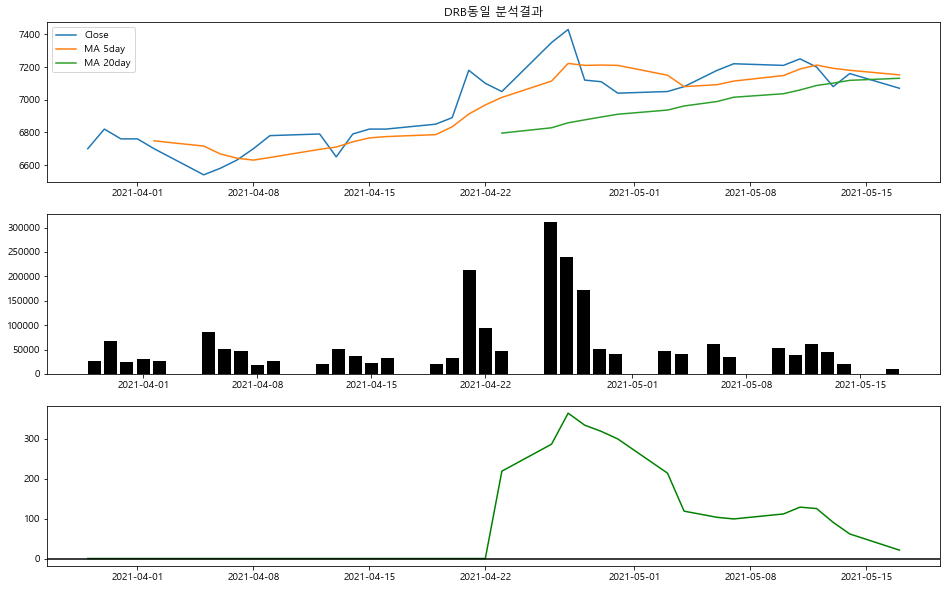

In [25]:
plt.figure(figsize = (16,10))

#price (가격)
plt.subplot(311)
plt.plot(STOCK.index, STOCK['Close'], label = 'Close')
plt.plot(STOCK.index, STOCK['MA_5'], label='MA 5day')
plt.plot(STOCK.index, STOCK['MA_20'], label='MA 20day')
plt.title(stock_name+" 분석결과")
plt.legend(loc='best')

# volume (거래량)
plt.subplot(312)
plt.bar(STOCK.index, STOCK['Volume'], color='black')

#  이동평균 차이 (diff)
diffChart = plt.subplot(313)
diffChart.plot(STOCK.index, STOCK['diff'].fillna(0), color='g')
plt.axhline(y=0, color='k') # https://financedata.github.io/posts/matplotlib_hline_and_vline.html